In [ ]:

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


In [ ]:
data=pd.read_csv("/Identifying Patterns and Trends in Campus Placement Data using Machine Learning.csv")
data


,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


<ipython-input-13-822c17649ab0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


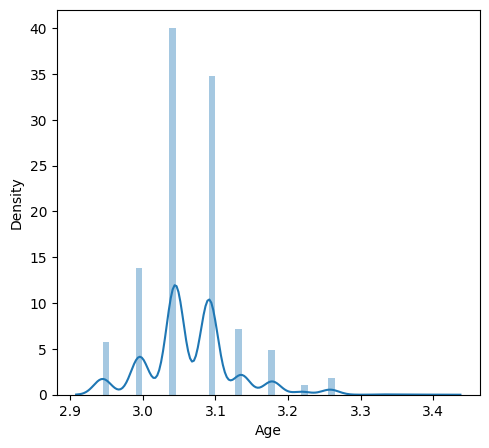

In [ ]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
transformationplot(np.log(data['Age']))


In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 8.1 MB/s eta 0

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data[['Gender']]=oe.fit_transform(data[['Gender']])
data[['Stream']]=oe.fit_transform(data[['Stream']])
data



,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1.0,3.0,1,8,1,1,1
1,21,0.0,1.0,0,7,1,1,1
2,22,0.0,4.0,1,6,0,0,1
3,21,1.0,4.0,0,8,0,1,1
4,22,1.0,5.0,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1.0,4.0,0,7,0,0,0
2962,23,1.0,5.0,1,7,1,0,0
2963,22,1.0,4.0,1,7,0,0,0
2964,22,1.0,1.0,1,7,0,0,0


<ipython-input-15-fb053affe21f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[['CGPA']],color='r')


<Axes: ylabel='Density'>

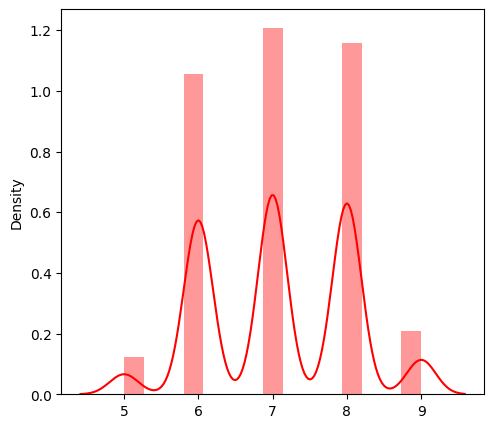

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data[['CGPA']],color='r')


<ipython-input-16-a623f219cd71>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[['PlacedOrNot']],color='r')


<Axes: ylabel='Density'>

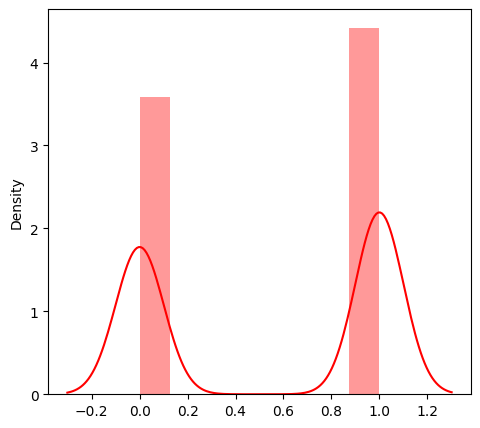

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data[['PlacedOrNot']],color='r')


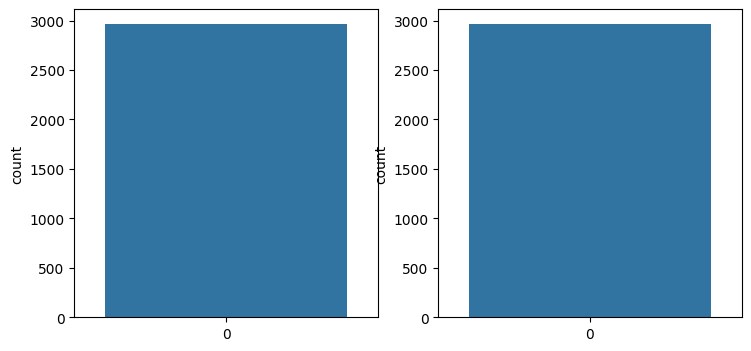

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['PlacedOrNot'])
plt.show()


In [ ]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1.0,3.0,1,8,1,1,1
1,21,0.0,1.0,0,7,1,1,1
2,22,0.0,4.0,1,6,0,0,1
3,21,1.0,4.0,0,8,0,1,1
4,22,1.0,5.0,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1.0,4.0,0,7,0,0,0
2962,23,1.0,5.0,1,7,1,0,0
2963,22,1.0,4.0,1,7,0,0,0
2964,22,1.0,1.0,1,7,0,0,0


In [ ]:
sc=StandardScaler()
data[['Age']]=sc.fit_transform(data[['Age']])
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,0.388131,1.0,3.0,1,8,1,1,1
1,-0.366752,0.0,1.0,0,7,1,1,1
2,0.388131,0.0,4.0,1,6,0,0,1
3,-0.366752,1.0,4.0,0,8,0,1,1
4,0.388131,1.0,5.0,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,1.143013,1.0,4.0,0,7,0,0,0
2962,1.143013,1.0,5.0,1,7,1,0,0
2963,0.388131,1.0,4.0,1,7,0,0,0
2964,0.388131,1.0,1.0,1,7,0,0,0


In [ ]:
X=data.iloc[:,0:-1]
X


,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,0.388131,1.0,3.0,1,8,1,1
1,-0.366752,0.0,1.0,0,7,1,1
2,0.388131,0.0,4.0,1,6,0,0
3,-0.366752,1.0,4.0,0,8,0,1
4,0.388131,1.0,5.0,0,8,1,0
...,...,...,...,...,...,...,...
2961,1.143013,1.0,4.0,0,7,0,0
2962,1.143013,1.0,5.0,1,7,1,0
2963,0.388131,1.0,4.0,1,7,0,0
2964,0.388131,1.0,1.0,1,7,0,0


In [ ]:
y=data.iloc[:,-1:]
y


,PlacedOrNot
0,1
1,1
2,1
3,1
4,1
...,...
2961,0
2962,0
2963,0
2964,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=16)
X_train

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
1879,0.388131,1.0,4.0,0,8,0,1
1710,0.388131,1.0,5.0,1,5,0,0
1764,1.143013,1.0,0.0,0,6,0,1
187,-0.366752,1.0,1.0,1,6,0,0
1582,-0.366752,1.0,5.0,1,5,1,0
...,...,...,...,...,...,...,...
635,0.388131,1.0,2.0,2,8,0,0
1345,2.652777,1.0,1.0,1,7,0,0
581,-0.366752,1.0,0.0,1,8,0,0
2169,0.388131,1.0,4.0,1,5,1,0


In [ ]:
y_train

,PlacedOrNot
1879,1
1710,0
1764,0
187,0
1582,0
...,...
635,1
1345,1
581,1
2169,0


In [ ]:
X_test

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
2059,-0.366752,1.0,1.0,0,8,0,0
1004,0.388131,1.0,2.0,2,6,0,0
2173,-1.121634,0.0,1.0,0,9,1,1
994,-0.366752,1.0,4.0,1,6,1,1
890,0.388131,1.0,3.0,0,8,0,0
...,...,...,...,...,...,...,...
2003,-1.876516,1.0,1.0,0,8,0,0
1496,-0.366752,1.0,2.0,2,8,0,1
2065,-0.366752,1.0,4.0,2,7,0,1
1228,0.388131,1.0,5.0,0,9,1,1


In [ ]:
y_test

,PlacedOrNot
2059,1
1004,1
2173,1
994,1
890,1
...,...
2003,1
1496,1
2065,0
1228,1


In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
pred_test=svm.predict(X_test)
pred_train=svm.predict(X_train)
train_accuracy=accuracy_score(pred_train,y_train)
test_accuracy=accuracy_score(pred_test,y_test)
print("accuracy on training data is",train_accuracy)
print("accuracy on testing data is",test_accuracy)

accuracy on training data is 0.7765598650927488
accuracy on testing data is 0.7474747474747475


In [ ]:
best_k=0
best_score=0
for k in range(3,50,2):
    knn_temp=KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train,y_train)
    knn_temp_predict=knn_temp.predict(X_test)
    score=accuracy_score(y_test,knn_temp_predict)*100
    if score>best_score and score<100:
        best_score=score
        best_k=k
print("k=",best_k)
print("accuracy=",best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

k= 5
accuracy= 88.04713804713805


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from keras.losses import BinaryCrossentropy
classifier=Sequential()
classifier.add(Dense(7,activation='relu',input_dim=7))
classifier.add(Dropout(0.50))
classifier.add(Dense(7,activation='relu'))
classifier.add(Dropout(0.50))
classifier.add(Dense(1,activation='sigmoid'))
loss1=BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss1,metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=20,epochs=100)

Epoch 1/100
119/119 [==============================] - 1s 2ms/step - loss: 1.1393 - accuracy: 0.5308
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 0.8245 - accuracy: 0.5093
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7273 - accuracy: 0.5282
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7155 - accuracy: 0.5304
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5341
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5333
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5434
Epoch 8/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5367
Epoch 9/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5460
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6863 - accura

In [ ]:

import gradio as gr
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def placement_model(input_data):

    knn_temp=KNeighborsClassifier(n_neighbors=best_k)
    knn_temp.fit(X_train,y_train)
    input_data_2d = np.array(input_data).reshape(1, -1)
    knn_temp_predict=knn_temp.predict(input_data_2d)

    if knn_temp_predict ==0:
        return "not placed"
    else:
        return "placed"
def preprocess_data(Age, Gender, Stream, Internships, CGPA, Hostel, HistoryOfBacklogs):

    le = LabelEncoder()
    gender = le.fit_transform([Gender])[0] if Gender else 0
    stream = le.fit_transform([Stream])[0] if Stream else 0

    sc = StandardScaler()
    age = sc.fit_transform([[Age]])[0][0]

    input_data = [age, gender, stream, Internships, CGPA, Hostel, HistoryOfBacklogs]

    return input_data
inputs = ["number", "text", "text", "number", "number", "number", "number"]
outputs = "text"
gr_interface = gr.Interface(
    fn=lambda Age, Gender, Stream, Internships, CGPA, Hostel, HistoryOfBacklogs:
        placement_model(preprocess_data(Age, Gender, Stream, Internships, CGPA, Hostel, HistoryOfBacklogs)),
    inputs=inputs,
    outputs=outputs,
    live=True
)

gr_interface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:277: UserWarning: api_name predict already exists, using predict_1
  warnings.warn(f"api_name {api_name} already exists, using {api_name_}")
/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:277: UserWarning: api_name predict already exists, using predict_2
  warnings.warn(f"api_name {api_name} already exists, using {api_name_}")
/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:277: UserWarning: api_name predict already exists, using predict_3
  warnings.warn(f"api_name {api_name} already exists, using {api_name_}")
/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:277: UserWarning: api_name predict already exists, using predict_4
  warnings.warn(f"api_name {api_name} already exists, using {api_name_}")
/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:277: UserWarning: api_name predict already exists, using predict_5
  warnings.warn(f"api_name {api_name} already exists, using {api_name_}")
/usr/local

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 8.4 MB/s eta 0: